<a href="https://colab.research.google.com/github/anandhulk/Quora-sincere-and-insincere-questions-classification/blob/main/Bidirectional_moldel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
data=pd.read_csv('/content/drive/MyDrive/dataset-quora/balanced.csv') #THIS IS THE LEMMATIZED DATA
data


,0,target
0,have the United States become the large dictat...,1
1,which baby be more sweeter to their parent da...,1
2,if black support school choice and mandatory s...,1
3,I be gay boy and I love my cousin ( boy ) he ...,1
4,which race have the small penis,1
...,...,...
161614,will you be offend if you give someone a birth...,0
161615,what should I study to design levitating vehic...,0
161616,be a five year love affair serious,0
161617,what can be do to keep Republicans from replac...,0


In [5]:
data=data.sample(frac=1).reset_index(drop=True)
data

,0,target
0,how can I get a deal with the devil,1
1,will add more illegal migrant to the USA incre...,1
2,be it true that white people disrespect nature...,1
3,how be a depth perception test like,0
4,if I a Christian we to write ( PBUH ) after ...,0
...,...,...
161614,what be the interior trend I can easily add to...,0
161615,do you agree with the way Trump be respond to ...,0
161616,what do she study in college do she participa...,0
161617,why be Quora so politicaly bias even when the...,1


In [ ]:
#data.to_csv("questions_shuffled_lemmatized.csv",index=False)

In [6]:
data=data.dropna()

# Data cleaning(removing ?.!*@#%*_+}{ etc..)

In [7]:
import re

def clean_text(series):
    res=[]
    for row in series:
        text = re.sub(r'[^(a-zA-Z)\s]','', row)
        res.append(text)
    res=pd.Series(res)
    return res

In [8]:
cleaned_x=clean_text(data["0"])

In [9]:
cleaned_x

0                      how can I get a deal with the devil 
1         will add more illegal migrant to the USA incre...
2         be it true that white people disrespect nature...
3                      how be a depth perception test like 
4         if I  a Christian  we to write ( PBUH ) after ...
                                ...                        
161614    what be the interior trend I can easily add to...
161615    do you agree with the way Trump be respond to ...
161616    what do she study in college  do she participa...
161617    why be Quora so politicaly bias  even when the...
161618                what be the mechanism behund bitcoin 
Length: 161619, dtype: object

In [10]:
y=data["target"]
y

0         1
1         1
2         1
3         0
4         0
         ..
161614    0
161615    0
161616    0
161617    1
161618    0
Name: target, Length: 161619, dtype: int64

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,GRU

# **One Hot encoding**

In [12]:
vocab_size=10000
encoded_x = [one_hot(row, vocab_size) for row in cleaned_x]
encoded_x=pd.Series(encoded_x)

In [13]:
cleaned_x[:5]

0                 how can I get a deal with the devil 
1    will add more illegal migrant to the USA incre...
2    be it true that white people disrespect nature...
3                 how be a depth perception test like 
4    if I  a Christian  we to write ( PBUH ) after ...
dtype: object

In [14]:
encoded_x[:5]

0    [2770, 7532, 3930, 4249, 3765, 2287, 758, 6017...
1    [6230, 4361, 610, 9520, 9686, 4236, 6017, 2988...
2    [3741, 3147, 3308, 3130, 6869, 3956, 7791, 472...
3            [2770, 3741, 3765, 1261, 224, 7888, 4794]
4    [688, 3930, 3765, 6966, 8005, 4236, 9539, 1885...
dtype: object

# **Padding the Sequence**

In [15]:
maximum_length=100
padded_x=pad_sequences(encoded_x,maxlen=maximum_length,padding='pre')

In [16]:
padded_x

array([[   0,    0,    0, ...,  758, 6017, 9253],
       [   0,    0,    0, ..., 6653, 2044, 4727],
       [   0,    0,    0, ..., 6017, 2312, 2928],
       ...,
       [   0,    0,    0, ..., 9964, 3765,  426],
       [   0,    0,    0, ..., 6653, 9800, 3053],
       [   0,    0,    0, ..., 1374, 9585, 9554]], dtype=int32)

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(padded_x,y,random_state=42)
xtrain.shape,ytrain.shape

((121214, 100), (121214,))

# **BIDIRECTIONAL LSTM MODEL**

In [24]:
model=Sequential([
    Embedding(vocab_size,50,input_length=maximum_length),
    Bidirectional(LSTM(128,return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(64,return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dense(50,activation="tanh"),
    Dropout(0.2),
    Dense(10,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")
])

In [25]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=METRICS)


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           500000    
                                                                 
 bidirectional_8 (Bidirectio  (None, 100, 256)         183296    
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 100, 256)          0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 100, 128)         164352    
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 100, 128)          0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 64)              

In [26]:
model.fit(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
3788/3788 [==============================] - 156s 39ms/step - loss: 0.3466 - accuracy: 0.8616 - precision: 0.8531 - recall: 0.8737 - val_loss: 0.3061 - val_accuracy: 0.8788 - val_precision: 0.8656 - val_recall: 0.8970
Epoch 2/5
3788/3788 [==============================] - 146s 39ms/step - loss: 0.2911 - accuracy: 0.8886 - precision: 0.8769 - recall: 0.9041 - val_loss: 0.3086 - val_accuracy: 0.8772 - val_precision: 0.8564 - val_recall: 0.9066
Epoch 3/5
3788/3788 [==============================] - 144s 38ms/step - loss: 0.2622 - accuracy: 0.8996 - precision: 0.8864 - recall: 0.9166 - val_loss: 0.3487 - val_accuracy: 0.8721 - val_precision: 0.8910 - val_recall: 0.8480
Epoch 4/5
3788/3788 [==============================] - 142s 38ms/step - loss: 0.2332 - accuracy: 0.9109 - precision: 0.8986 - recall: 0.9264 - val_loss: 0.3278 - val_accuracy: 0.8761 - val_precision: 0.8710 - val_recall: 0.8831
Epoch 5/5
3788/3788 [==============================] - 142s 37ms/step - loss: 0.2049 - a

In [27]:
model.evaluate(xtest,ytest)

1263/1263 [==============================] - 20s 16ms/step - loss: 0.3648 - accuracy: 0.8716 - precision: 0.8552 - recall: 0.8948


[0.36476069688796997,
 0.8715752959251404,
 0.8552109003067017,
 0.8947706818580627]

In [ ]:
model.save("/content/drive/MyDrive/dataset-quora/BidirectionalLSTM/")

<a href="./BidirectionalLSTM"> Download File </a>

# **EVALUATION**

In [53]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
y_pred=model.predict(xtest)

In [57]:
y_p=[]
for i in y_pred:
    if(i>=0.5):
        y_p.append(1)
    else:
        y_p.append(0)

In [59]:
confusion=confusion_matrix(ytest,y_p)

# **CONFUSION MATRIX**

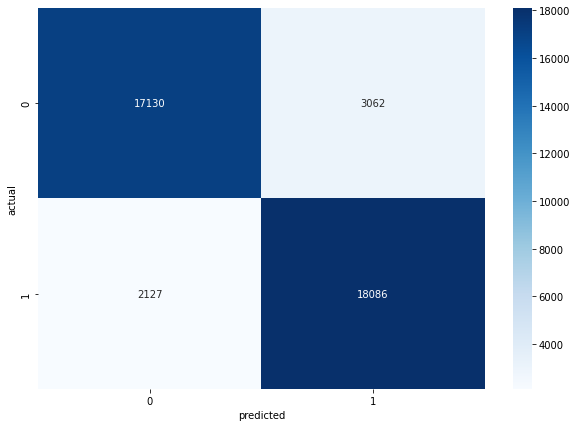

In [60]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [62]:
print("     Classification report of Word2vec + LSTM model\n")
print(classification_report(ytest,y_p))

     Classification report of Word2vec + LSTM model

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     20192
           1       0.86      0.89      0.87     20213

    accuracy                           0.87     40405
   macro avg       0.87      0.87      0.87     40405
weighted avg       0.87      0.87      0.87     40405



# **PREDICTION FUNCTION**

In [63]:
def Predict(stre):
  stre=one_hot(stre,vocab_size)
  X=[]
  X.append(stre)
  stre=pad_sequences(X,100)
  y=model.predict(stre)
  if y >= .5:
      print("insincere")
  else:
      print("sincere")
  print(y)

In [ ]:
q=input("Enter your Question :")
Predict(q)